# Basics of NetworkX

In [23]:
import networkx as nx

In [43]:
# We first create a graph object like this, and then we can add nodes either alone or as a list
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,"u","v"])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [44]:
# The same is true for edges, which are tuples
G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u","w")
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [45]:
# We can also remove nodes like this, which also removes their edges
G.remove_node(2)
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [46]:
G.remove_nodes_from([4,5])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [48]:
# The same is true for edges, but this does not delete associated nodes.
G.remove_edge(1,3)
G.remove_edges_from([(1,2),("u","v")])
G.edges

EdgeView([(1, 6), ('u', 'w')])

In [21]:
G.number_of_nodes()

6

In [23]:
G.number_of_edges()

2

# Graph Visualisation

In [57]:
# We can import data from the NetworkX module as well
G = nx.karate_club_graph()
import matplotlib.pyplot as plt

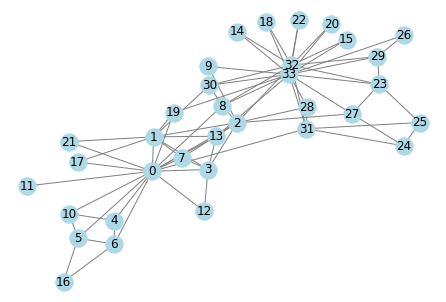

In [58]:
nx.draw(G,with_labels=True,node_color="lightblue",edge_color="gray")
plt.savefig("karate_graph.pdf")

In [62]:
# NetworkX stores notes in a DegreeView object, similar to a dictionary, where the keys are the nodes
# and the values are their degrees
print(G.degree())
# We can also find a node's degree using the method, which takes 0 arguments
print(G.degree()[33])
# Or the function, which takes 1 argument
print(G.degree(33))

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
17
17


# Random Graphs

In [44]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

In [25]:
bernoulli.rvs(p=0.2)

1

In [39]:
def er_graph(N, p):
    """Creates a random ER graph."""
    # Create empty graph
    G = nx.Graph()
    # Add all N nodes to the graph
    G.add_nodes_from(range(N))
    # Loop over all pairs of nodes
    for node1 in G.nodes():
    #add edges with probability p
        for node2 in G.nodes():
            # we add this because otherwise, each node is checked twice (as node 1 and again as node2)
            if node1 < node2 and bernoulli.rvs(p) == 1:
                G.add_edge(node1,node2)
    return G

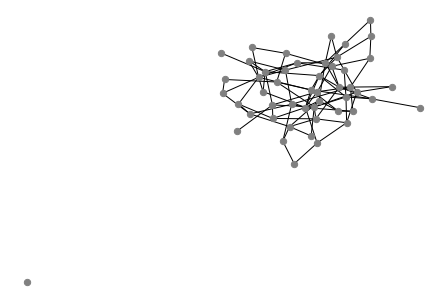

In [45]:
nx.draw(er_graph(50,0.08), node_size=40, node_color="gray")
plt.savefig("er1.pdf")

# Plotting the Degree Distribution

In [52]:
def plot_degree_distribution(G):
    degree_sequence = [d for n,d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree Distribution")

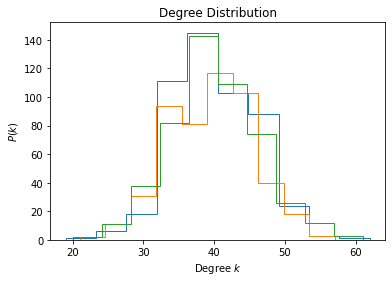

In [61]:
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("dd2.pdf")

# Descriptive Statistics of Empirical Social Networks

In [69]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [70]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [76]:
def basic_net_stats(G):
    print("Number of nodes:",G.number_of_nodes())
    print("Number of edges:",G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [78]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


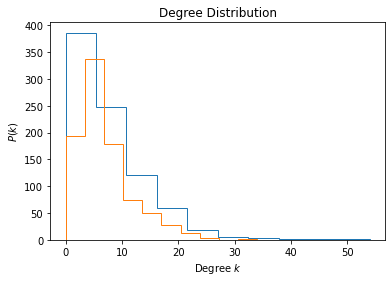

In [79]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("villagehist.pdf")

# Finding the Largest Connected Component

In [130]:
# One of the commands here is deprecated, this is a workaround
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [131]:
gen = connected_component_subgraphs(G1)

In [132]:
# This function cycles through the components in the graph, in an arbitrary order
g = gen.__next__()
# You can run this len command repeatedly to cycle through the nodes
len(gen.__next__())

3

In [133]:
# Here, we create variables which are the largest connected components in each graph
G1_LCC = max(connected_component_subgraphs(G1), key=len)
G2_LCC = max(connected_component_subgraphs(G2), key=len)

In [134]:
# This tells us how many nodes are in G1's largest component
len(G1_LCC)

825

In [139]:
len(G2_LCC)

810

In [135]:
# This tells us the proportion of G1's nodes which are in this component
G1_LCC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

In [136]:
# This tells us the proportion of G2's nodes which are in this component
G2_LCC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

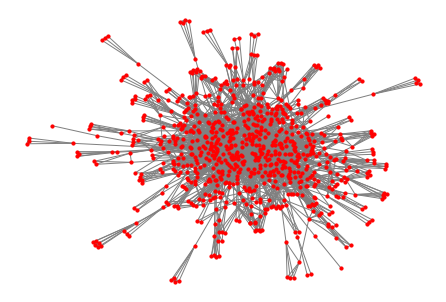

In [137]:
plt.figure()
nx.draw(G1_LCC,node_color="red",edge_color="gray",node_size=10)
plt.savefig("village1.pdf")

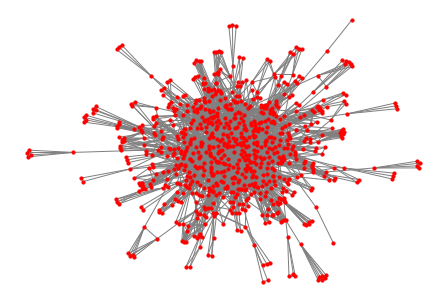

In [138]:
plt.figure()
nx.draw(G1_LCC,node_color="red",edge_color="gray",node_size=10)
plt.savefig("village2.pdf")